In [1]:
import pandas as pd
from utils import gen_df_filt, gen_correlations, gen_correlations_over_time

## Commits Dataframes

In [2]:
df_commits_bittensor = pd.read_json('datasets/bittensor_commits.json')
df_commits_fetchai = pd.read_json('datasets/fetchai_commits.json')
df_commits_numerai = pd.read_json('datasets/numerai_commits.json')
df_commits_ocean = pd.read_json('datasets/oceanprotocol_commits.json')
df_commits_oraichain = pd.read_json('datasets/oraichain_commits.json')
df_commits_singular = pd.read_json('datasets/singularitynet_commits.json')

In [3]:
df_commits_bittensor_filt = gen_df_filt(df_commits_bittensor)
df_commits_fetchai_filt = gen_df_filt(df_commits_fetchai)
df_commits_numerai_filt = gen_df_filt(df_commits_numerai)
df_commits_ocean_filt = gen_df_filt(df_commits_ocean)
df_commits_oraichain_filt = gen_df_filt(df_commits_oraichain)
df_commits_singular_filt = gen_df_filt(df_commits_singular)

In [4]:
df_commits_bittensor_filt['date'] = pd.to_datetime(pd.to_datetime(df_commits_bittensor_filt['date']).dt.date).dt.tz_localize(None)
df_commits_fetchai_filt['date'] = pd.to_datetime(pd.to_datetime(df_commits_fetchai_filt['date']).dt.date).dt.tz_localize(None)
df_commits_numerai_filt['date'] = pd.to_datetime(pd.to_datetime(df_commits_numerai_filt['date']).dt.date).dt.tz_localize(None)
df_commits_ocean_filt['date'] = pd.to_datetime(pd.to_datetime(df_commits_ocean_filt['date']).dt.date).dt.tz_localize(None)
df_commits_oraichain_filt['date'] = pd.to_datetime(pd.to_datetime(df_commits_oraichain_filt['date']).dt.date).dt.tz_localize(None)
df_commits_singular_filt['date'] = pd.to_datetime(pd.to_datetime(df_commits_singular_filt['date']).dt.date).dt.tz_localize(None)

## Price Dataframes

In [5]:
df_bittensor_price = pd.read_csv('datasets/bittensor_token_price.csv').rename(columns={'Date': 'date'})
df_bittensor_price['date'] = pd.to_datetime(df_bittensor_price['date'])
df_fetchai_price = pd.read_csv('datasets/fetchai_token_price.csv').rename(columns={'Date': 'date'})
df_fetchai_price['date'] = pd.to_datetime(df_fetchai_price['date'])
df_numerai_price = pd.read_csv('datasets/numerai_token_price.csv').rename(columns={'Date': 'date'})
df_numerai_price['date'] = pd.to_datetime(df_numerai_price['date'])
df_ocean_price = pd.read_csv('datasets/oceanprotocol_token_price.csv').rename(columns={'Date': 'date'})
df_ocean_price['date'] = pd.to_datetime(df_ocean_price['date'])
df_oraichain_price = pd.read_csv('datasets/oraichain_token_price.csv').rename(columns={'Date': 'date'})
df_oraichain_price['date'] = pd.to_datetime(df_oraichain_price['date'])
df_singular_price = pd.read_csv('datasets/singularitynet_token_price.csv').rename(columns={'Date': 'date'})
df_singular_price['date'] = pd.to_datetime(df_singular_price['date'])

## Merge with Price

In [6]:
df_bittensor_merged = pd.merge(df_commits_bittensor_filt, df_bittensor_price, on='date', how='left').dropna()
df_fetchai_merged = pd.merge(df_commits_fetchai_filt, df_fetchai_price, on='date', how='left').dropna()
df_numerai_merged = pd.merge(df_commits_numerai_filt, df_numerai_price, on='date', how='left').dropna()
df_ocean_merged = pd.merge(df_commits_ocean_filt, df_ocean_price, on='date', how='left').dropna()
df_oraichain_merged = pd.merge(df_commits_oraichain_filt, df_oraichain_price, on='date', how='left').dropna()
df_singular_merged = pd.merge(df_commits_singular_filt, df_singular_price, on='date', how='left').dropna()

In [7]:
df_bittensor_final = df_bittensor_merged.groupby('date').agg({'sha':'count', 'repo': 'count', 'Open':'mean', 'High':'mean', 'Low': 'mean', 'Close': 'mean', 'Volume': 'mean'}).reset_index().sort_values(by='sha')
df_fetchai_final = df_fetchai_merged.groupby('date').agg({'sha':'count', 'repo': 'count', 'Open':'mean', 'High':'mean', 'Low': 'mean', 'Close': 'mean', 'Volume': 'mean'}).reset_index().sort_values(by='sha')
df_numerai_final = df_numerai_merged.groupby('date').agg({'sha':'count', 'repo': 'count', 'Open':'mean', 'High':'mean', 'Low': 'mean', 'Close': 'mean', 'Volume': 'mean'}).reset_index().sort_values(by='sha')
df_ocean_final = df_ocean_merged.groupby('date').agg({'sha':'count', 'repo': 'count', 'Open':'mean', 'High':'mean', 'Low': 'mean', 'Close': 'mean', 'Volume': 'mean'}).reset_index().sort_values(by='sha')
df_oraichain_final = df_oraichain_merged.groupby('date').agg({'sha':'count', 'repo': 'count', 'Open':'mean', 'High':'mean', 'Low': 'mean', 'Close': 'mean', 'Volume': 'mean'}).reset_index().sort_values(by='sha')
df_singular_final = df_singular_merged.groupby('date').agg({'sha':'count', 'repo': 'count', 'Open':'mean', 'High':'mean', 'Low': 'mean', 'Close': 'mean', 'Volume': 'mean'}).reset_index().sort_values(by='sha')

In [8]:
df_bittensor_final['year'] = df_bittensor_final['date'].dt.year
df_bittensor_final['week'] = df_bittensor_final['date'].dt.isocalendar().week
df_fetchai_final['year'] = df_fetchai_final['date'].dt.year
df_fetchai_final['week'] = df_fetchai_final['date'].dt.isocalendar().week
df_numerai_final['year'] = df_numerai_final['date'].dt.year
df_numerai_final['week'] = df_numerai_final['date'].dt.isocalendar().week
df_ocean_final['year'] = df_ocean_final['date'].dt.year
df_ocean_final['week'] = df_ocean_final['date'].dt.isocalendar().week
df_oraichain_final['year'] = df_oraichain_final['date'].dt.year
df_oraichain_final['week'] = df_oraichain_final['date'].dt.isocalendar().week
df_singular_final['year'] = df_singular_final['date'].dt.year
df_singular_final['week'] = df_singular_final['date'].dt.isocalendar().week

In [9]:
df_bittensor_final = df_bittensor_final.sort_values('date')
df_fetchai_final = df_fetchai_final.sort_values('date')
df_numerai_final = df_numerai_final.sort_values('date')
df_ocean_final = df_ocean_final.sort_values('date')
df_oraichain_final = df_oraichain_final.sort_values('date')
df_singular_final = df_singular_final.sort_values('date')

In [10]:
df_bittensor_final['weekYear'] = df_bittensor_final['week'].astype(str) + '-' + df_bittensor_final['year'].astype(str)
df_fetchai_final['weekYear'] = df_fetchai_final['week'].astype(str) + '-' + df_fetchai_final['year'].astype(str)
df_numerai_final['weekYear'] = df_numerai_final['week'].astype(str) + '-' + df_numerai_final['year'].astype(str)
df_ocean_final['weekYear'] = df_ocean_final['week'].astype(str) + '-' + df_ocean_final['year'].astype(str)
df_oraichain_final['weekYear'] = df_oraichain_final['week'].astype(str) + '-' + df_oraichain_final['year'].astype(str)
df_singular_final['weekYear'] = df_singular_final['week'].astype(str) + '-' + df_singular_final['year'].astype(str)

#### Calculate correlations

In [33]:
print(2018, df_singular_final[df_singular_final.year == 2018]['sha'].corr(df_singular_final[df_singular_final.year == 2018]['Close']))
print(2019, df_singular_final[df_singular_final.year == 2019]['sha'].corr(df_singular_final[df_singular_final.year == 2019]['Close']))
print(2020, df_singular_final[df_singular_final.year == 2020]['sha'].corr(df_singular_final[df_singular_final.year == 2020]['Close']))
print(2021, df_singular_final[df_singular_final.year == 2021]['sha'].corr(df_singular_final[df_singular_final.year == 2021]['Close']))
print(2022, df_singular_final[df_singular_final.year == 2022]['sha'].corr(df_singular_final[df_singular_final.year == 2022]['Close']))
print(2023, df_singular_final[df_singular_final.year == 2023]['sha'].corr(df_singular_final[df_singular_final.year == 2023]['Close']))
print(2024, df_singular_final[df_singular_final.year == 2024]['sha'].corr(df_singular_final[df_singular_final.year == 2024]['Close']))

2018 -0.43391468101024083
2019 -0.22121730305425763
2020 -0.3213337076539776
2021 -0.05527033115323363
2022 -0.045190943019182354
2023 -0.12270262987535835
2024 0.3034938216385507


### Organize per week 

In [12]:
df_bittensor_week = df_bittensor_final.groupby(['year', 'week']).agg({'sha':'sum', 'Close': 'max'}).reset_index()
df_fetchai_week = df_fetchai_final.groupby(['year', 'week']).agg({'sha':'sum', 'Close': 'max'}).reset_index()
df_numerai_week = df_numerai_final.groupby(['year', 'week']).agg({'sha':'sum', 'Close': 'max'}).reset_index()
df_ocean_week = df_ocean_final.groupby(['year', 'week']).agg({'sha':'sum', 'Close': 'max'}).reset_index()
df_oraichain_week = df_oraichain_final.groupby(['year', 'week']).agg({'sha':'sum', 'Close': 'max'}).reset_index()
df_singular_week = df_singular_final.groupby(['year', 'week']).agg({'sha':'sum', 'Close': 'max'}).reset_index()

weekly correlations

In [34]:
print(2018, df_singular_week[df_singular_week.year == 2018]['sha'].corr(df_singular_week[df_singular_week.year == 2018]['Close']))
print(2019, df_singular_week[df_singular_week.year == 2019]['sha'].corr(df_singular_week[df_singular_week.year == 2019]['Close']))
print(2020, df_singular_week[df_singular_week.year == 2020]['sha'].corr(df_singular_week[df_singular_week.year == 2020]['Close']))
print(2021, df_singular_week[df_singular_week.year == 2021]['sha'].corr(df_singular_week[df_singular_week.year == 2021]['Close']))
print(2022, df_singular_week[df_singular_week.year == 2022]['sha'].corr(df_singular_week[df_singular_week.year == 2022]['Close']))
print(2023, df_singular_week[df_singular_week.year == 2023]['sha'].corr(df_singular_week[df_singular_week.year == 2023]['Close']))
print(2024, df_singular_week[df_singular_week.year == 2024]['sha'].corr(df_singular_week[df_singular_week.year == 2024]['Close']))

2018 -0.6044534691418735
2019 -0.3628186420797694
2020 -0.4449547673302992
2021 -0.0667827991031504
2022 0.04199690402150791
2023 -0.24800829129592813
2024 0.567011409223744


### Organize per week and year

In [14]:
df_bittensor_weekYear = df_bittensor_final.groupby(['year', 'weekYear', 'week']).agg({'sha':'sum', 'Close': 'mean'}).reset_index().sort_values(by=['year', 'week'])
df_fetchai_weekYear = df_fetchai_final.groupby(['year', 'weekYear', 'week']).agg({'sha':'sum', 'Close': 'mean'}).reset_index().sort_values(by=['year', 'week'])
df_numerai_weekYear = df_numerai_final.groupby(['year', 'weekYear', 'week']).agg({'sha':'sum', 'Close': 'mean'}).reset_index().sort_values(by=['year', 'week'])
df_ocean_weekYear = df_ocean_final.groupby(['year', 'weekYear', 'week']).agg({'sha':'sum', 'Close': 'mean'}).reset_index().sort_values(by=['year', 'week'])
df_oraichain_weekYear = df_oraichain_final.groupby(['year', 'weekYear', 'week']).agg({'sha':'sum', 'Close': 'mean'}).reset_index().sort_values(by=['year', 'week'])
df_singular_weekYear = df_singular_final.groupby(['year', 'weekYear', 'week']).agg({'sha':'sum', 'Close': 'mean'}).reset_index().sort_values(by=['year', 'week'])

## Correlations

### Bittensor

per day

<Figure size 1500x800 with 0 Axes>

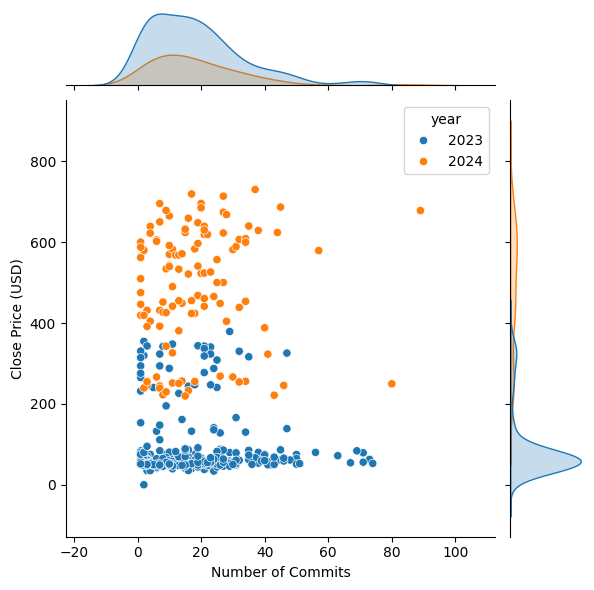

In [15]:
gen_correlations(df_bittensor_final, 'Bittensor', 'Day')

per week

<Figure size 1500x800 with 0 Axes>

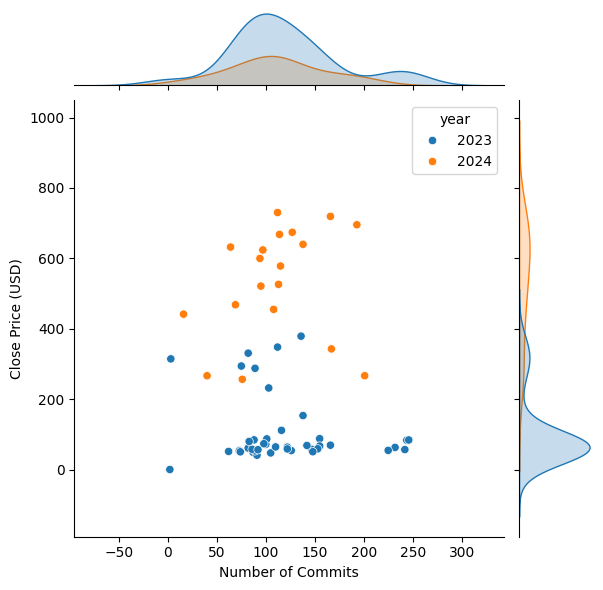

In [16]:
gen_correlations(df_bittensor_week , 'Bittensor', 'Week')

over time

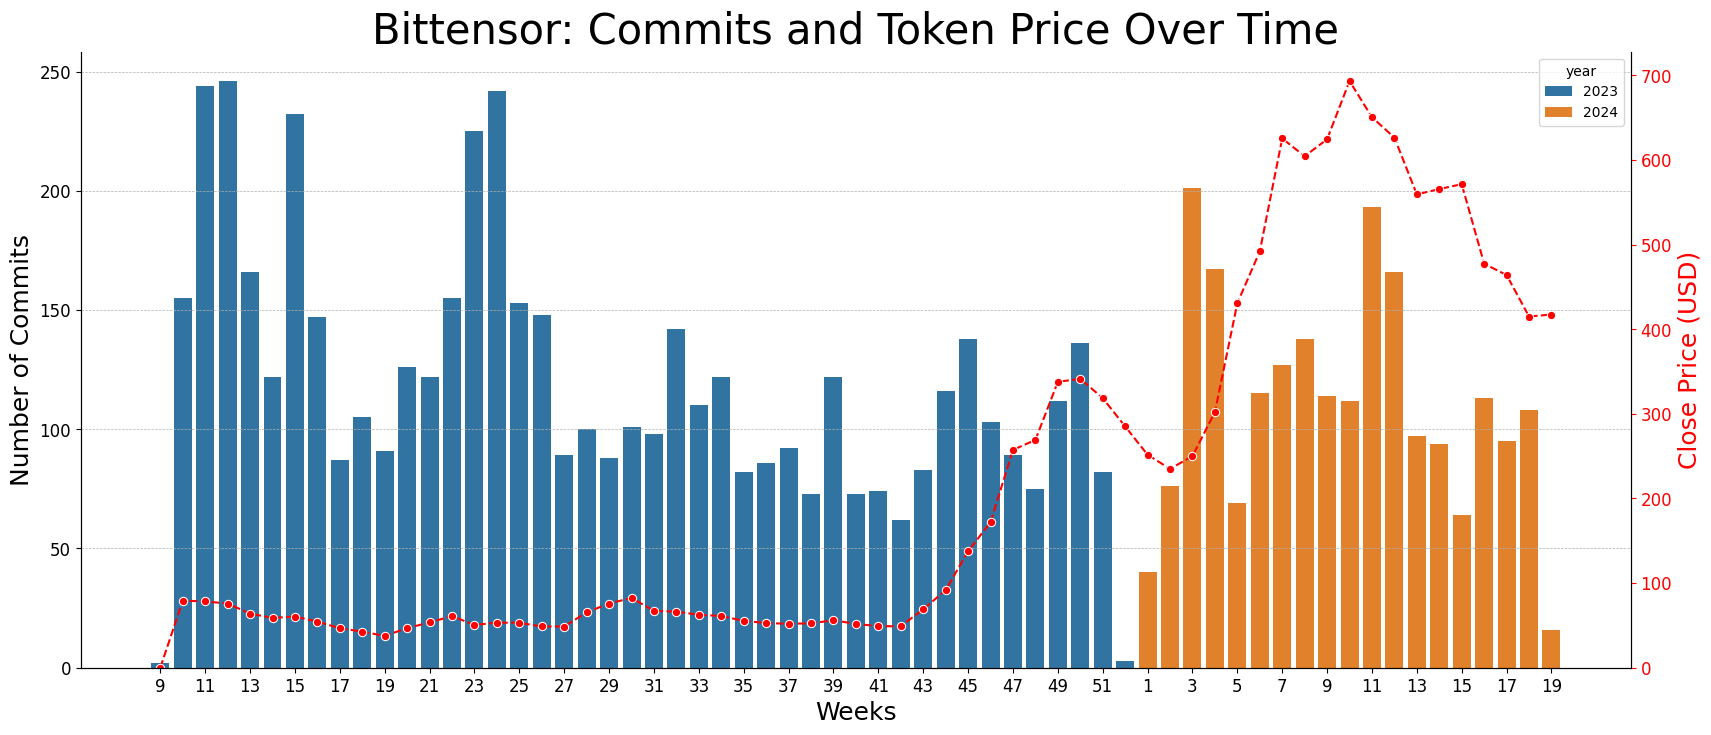

In [17]:
gen_correlations_over_time(df_bittensor_weekYear, 'Bittensor', 2)

### Fetchai

per day

<Figure size 1500x800 with 0 Axes>

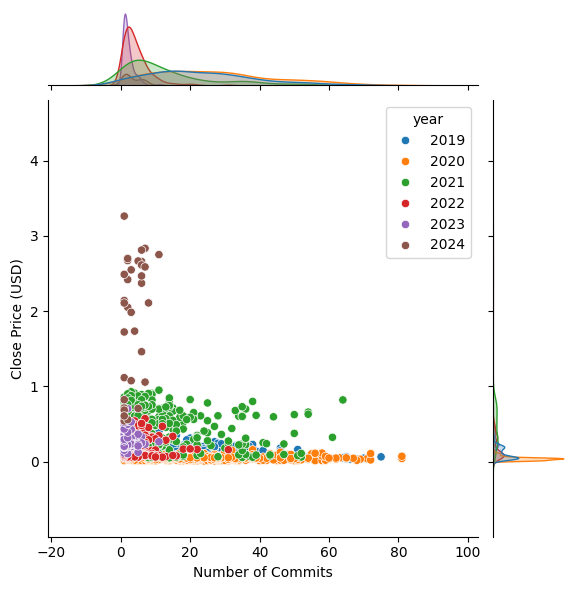

In [18]:
gen_correlations(df_fetchai_final, 'Fetch.ai', 'Day')

per week

<Figure size 1500x800 with 0 Axes>

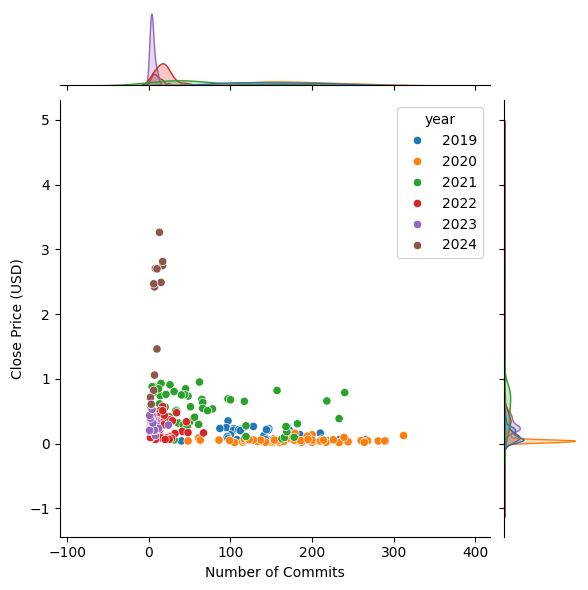

In [19]:
gen_correlations(df_fetchai_week, 'Fetch.ai', 'Week')

over time

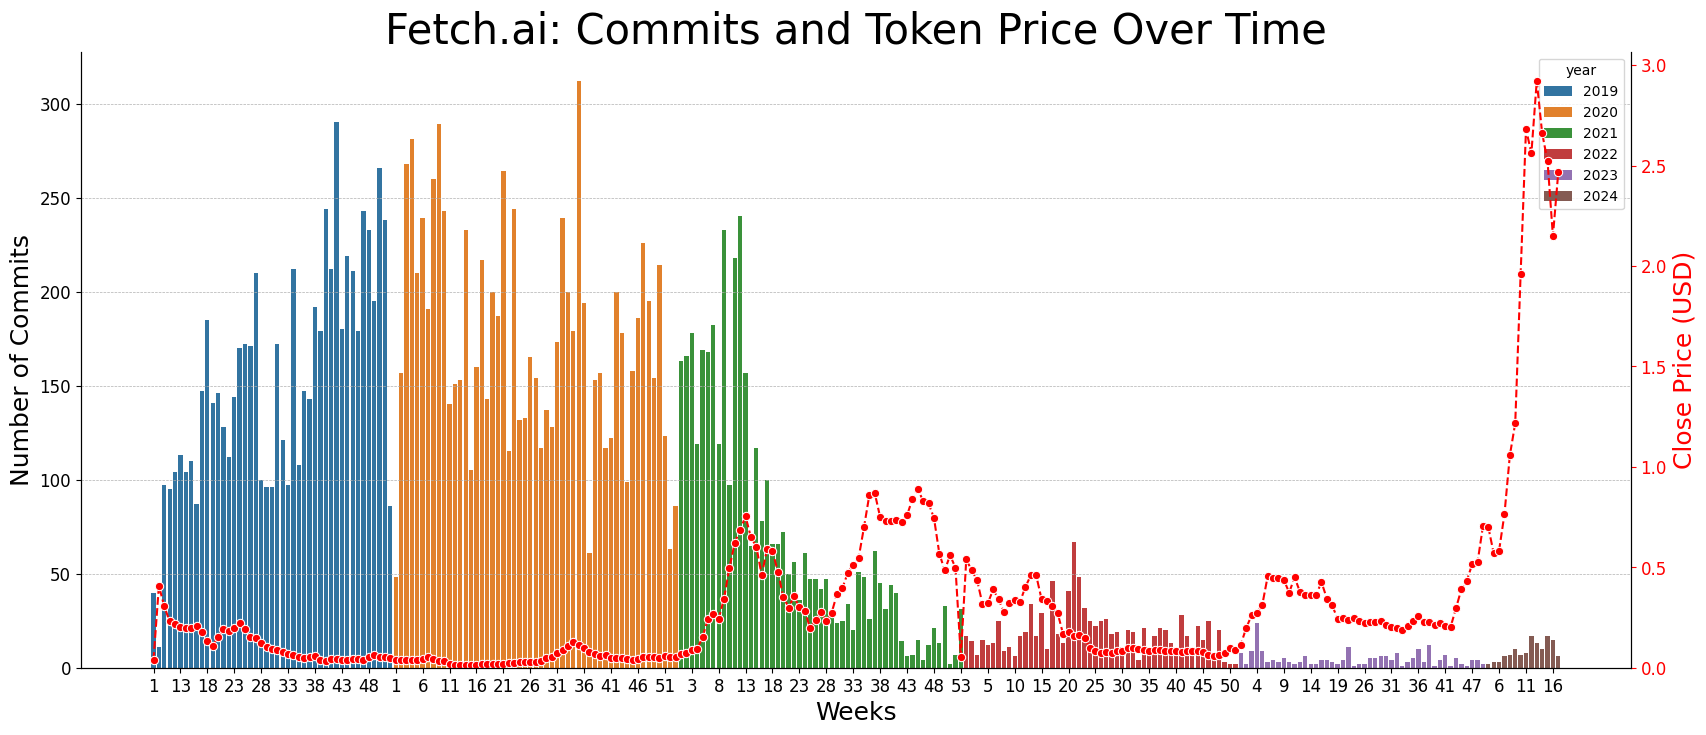

In [20]:
gen_correlations_over_time(df_fetchai_weekYear, 'Fetch.ai', 5)

### Numerai

per day

<Figure size 1500x800 with 0 Axes>

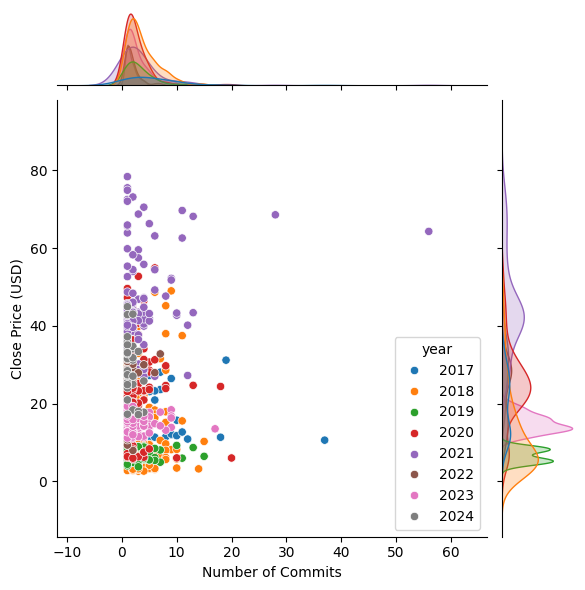

In [21]:
gen_correlations(df_numerai_final, 'Numerai', 'Day')

per week

<Figure size 1500x800 with 0 Axes>

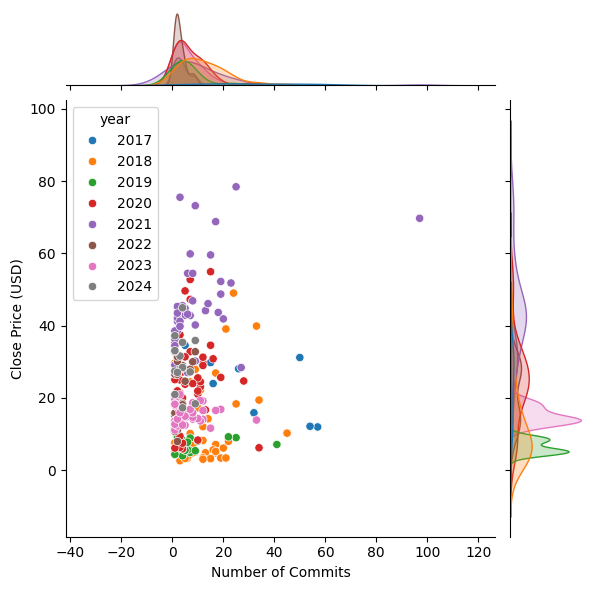

In [22]:
gen_correlations(df_numerai_week, 'Numerai', 'Week')

over time

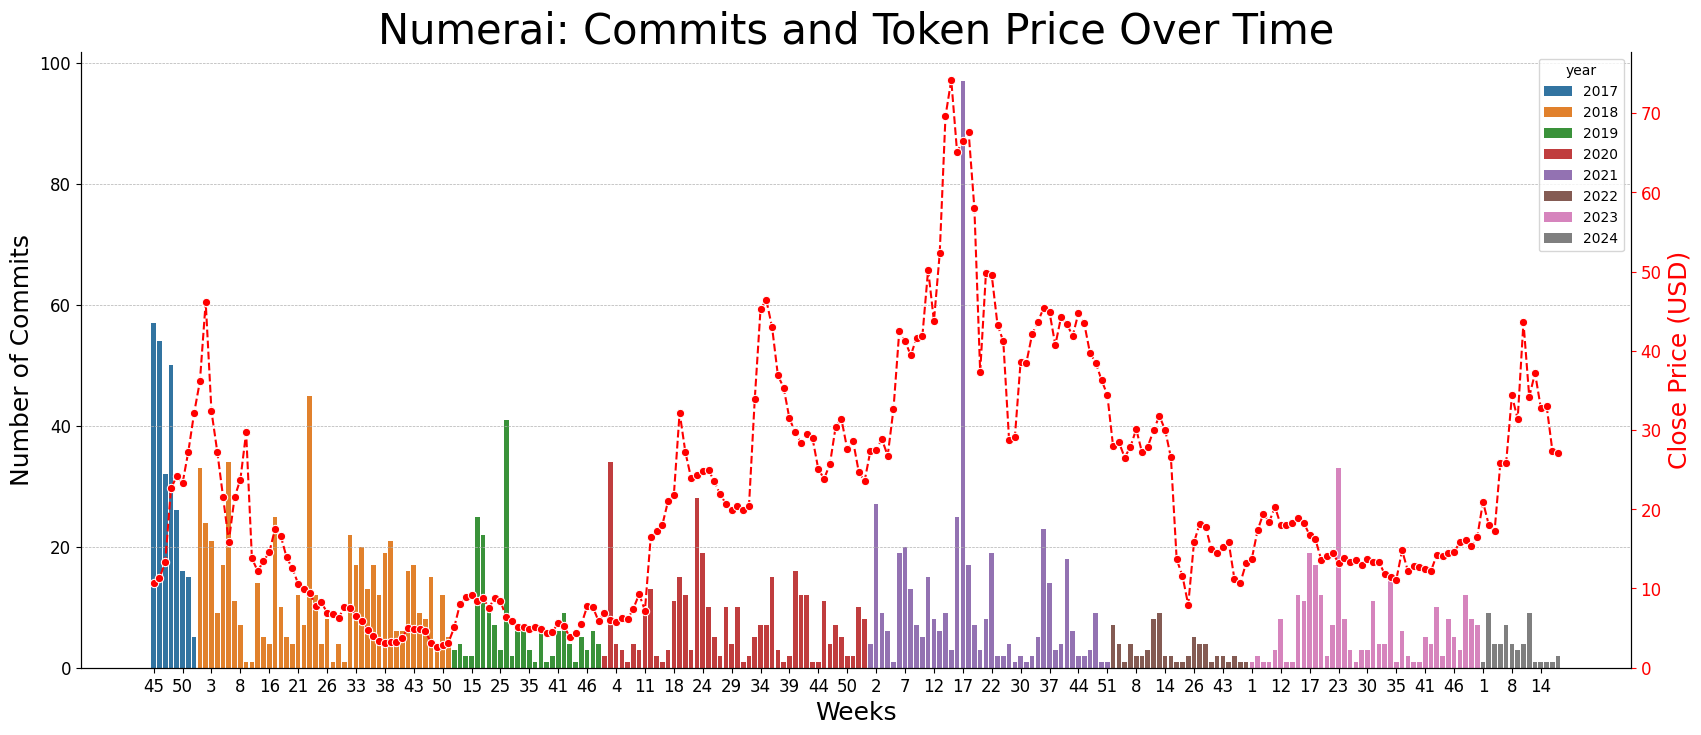

In [23]:
gen_correlations_over_time(df_numerai_weekYear, 'Numerai', 5)

### Ocean Protocol

per day

<Figure size 1500x800 with 0 Axes>

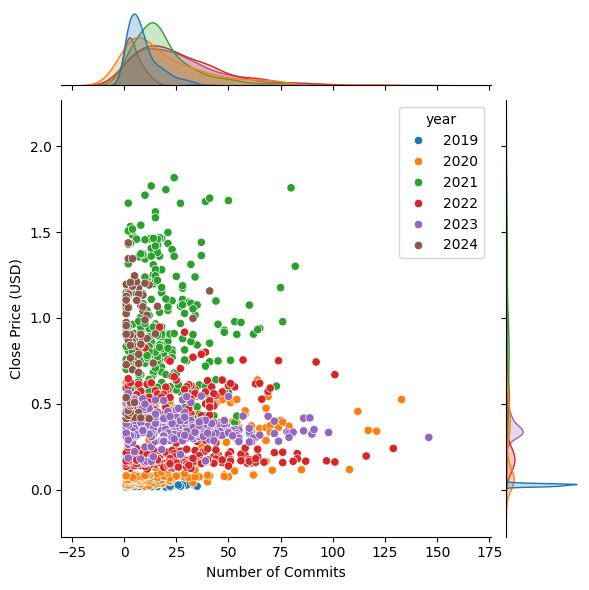

In [24]:
gen_correlations(df_ocean_final, 'Ocean Protocol', 'Day')

per week

<Figure size 1500x800 with 0 Axes>

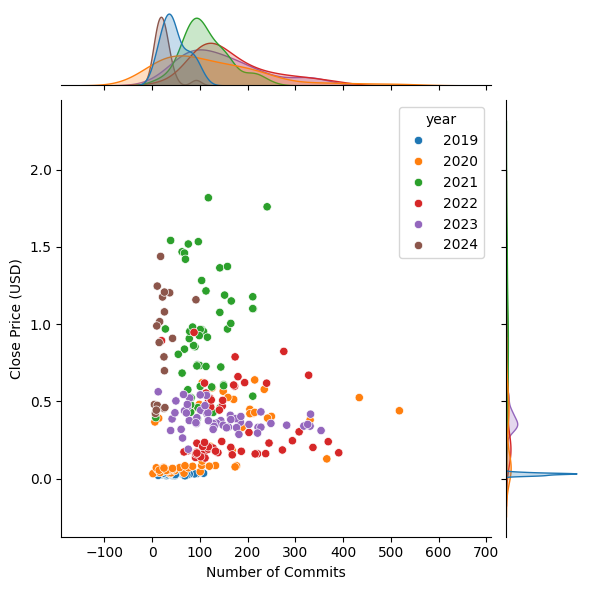

In [25]:
gen_correlations(df_ocean_week, 'Ocean Protocol', 'Week')

over time

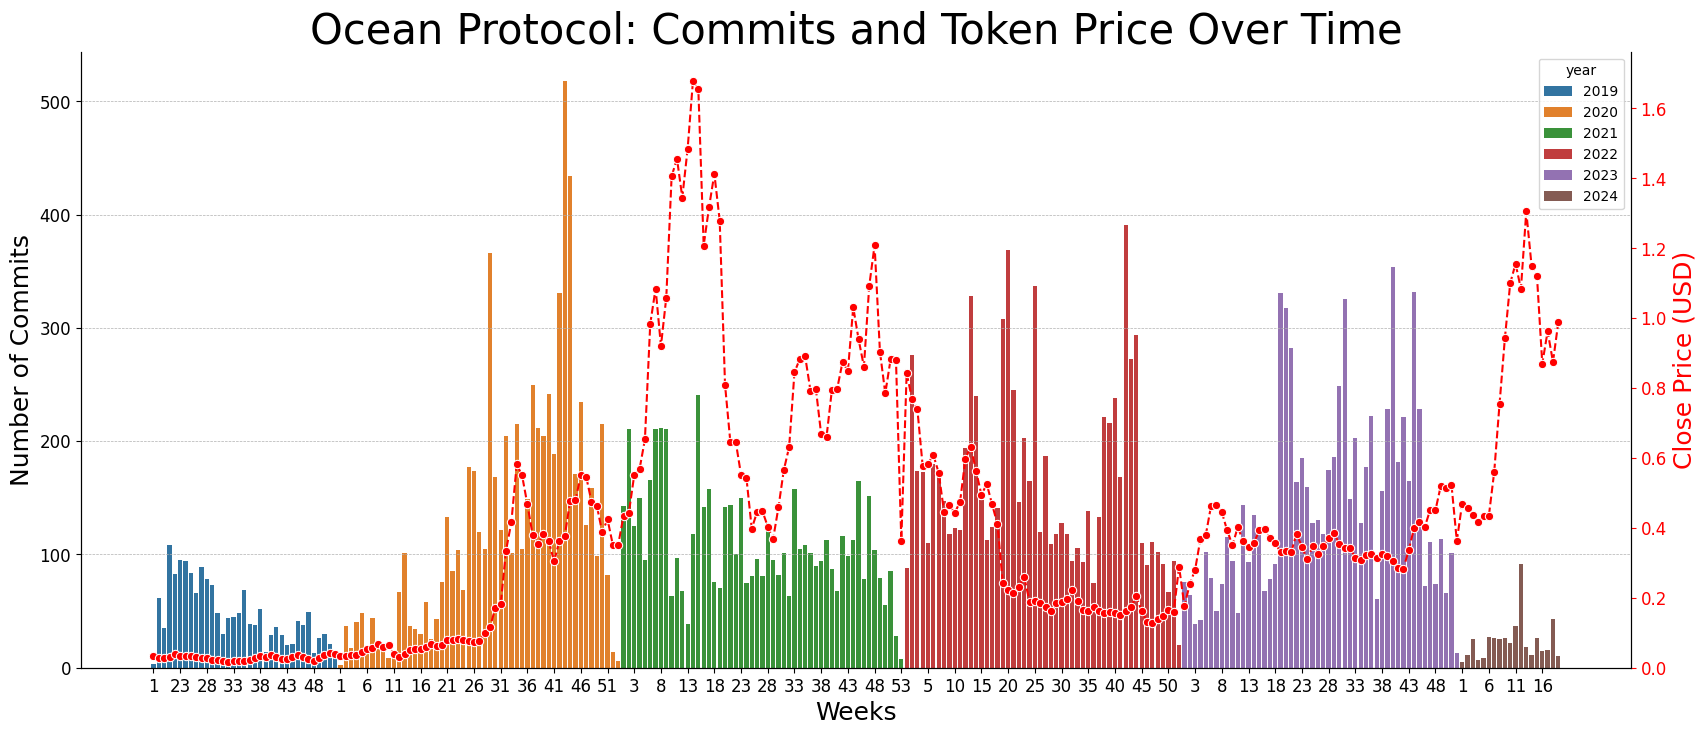

In [26]:
gen_correlations_over_time(df_ocean_weekYear, 'Ocean Protocol', 5)

### Oraichain

per day

<Figure size 1500x800 with 0 Axes>

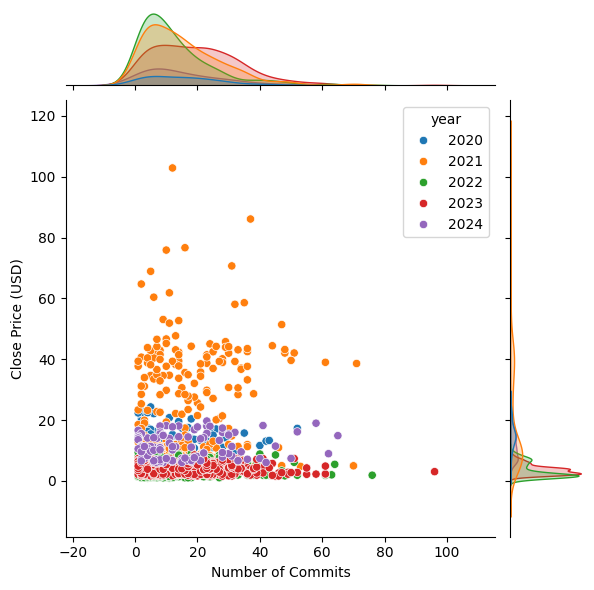

In [27]:
gen_correlations(df_oraichain_final, 'Oraichain', 'Day')

per week

<Figure size 1500x800 with 0 Axes>

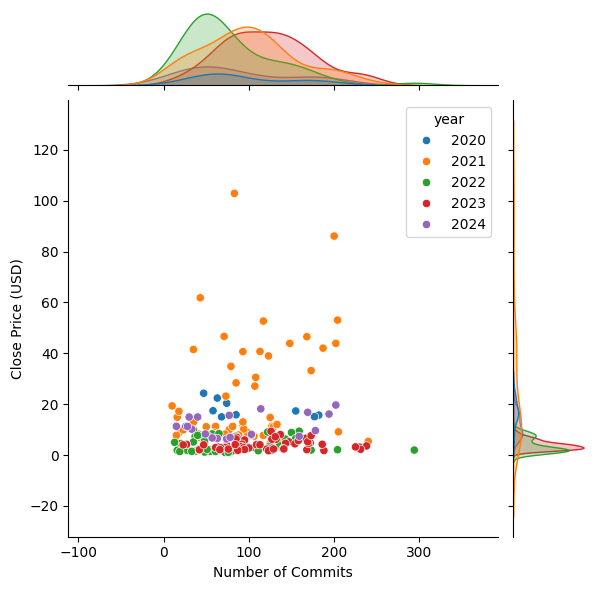

In [28]:
gen_correlations(df_oraichain_week, 'Oraichain', 'Week')

over time

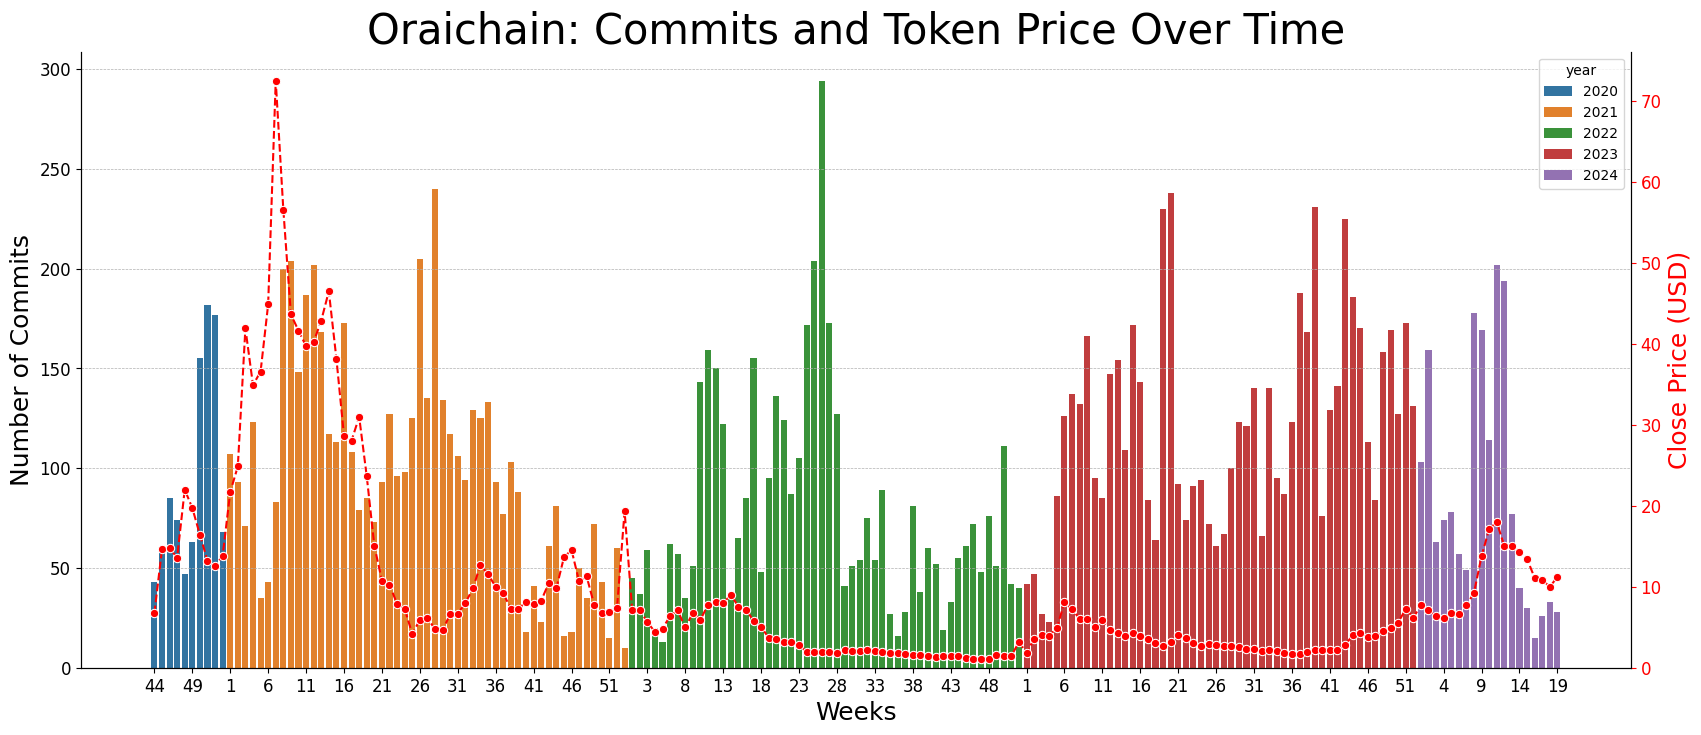

In [29]:
gen_correlations_over_time(df_oraichain_weekYear, 'Oraichain', 5)

### SingularityNET

per day

<Figure size 1500x800 with 0 Axes>

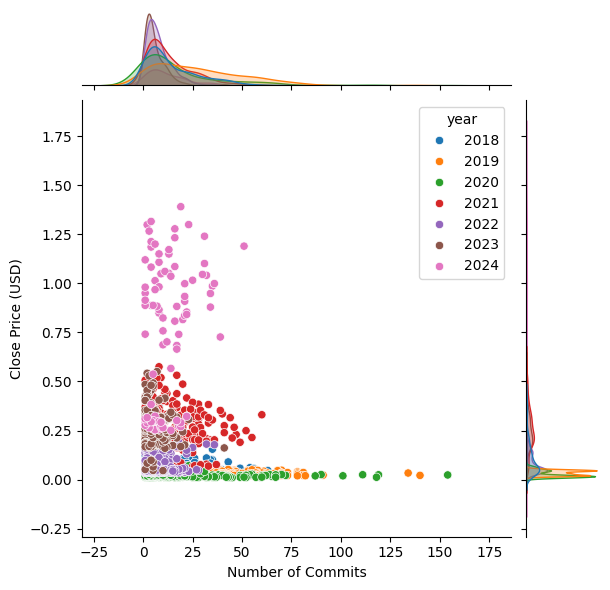

In [30]:
gen_correlations(df_singular_final, 'SingularityNET', 'Day')

per week

<Figure size 1500x800 with 0 Axes>

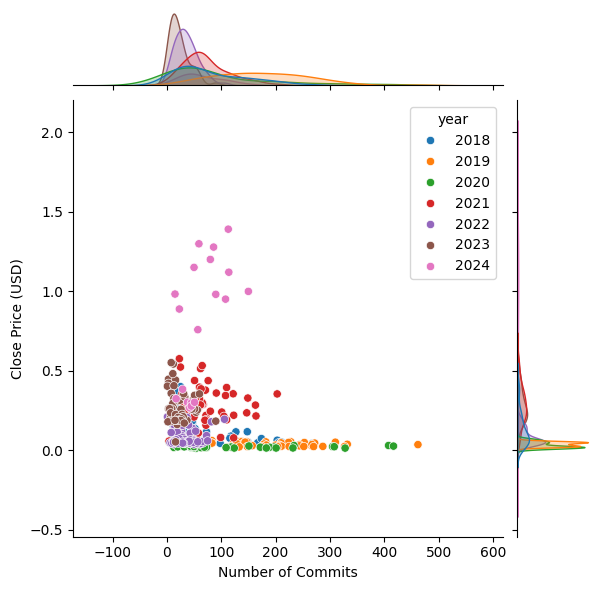

In [31]:
gen_correlations(df_singular_week, 'SingularityNET', 'Week')

over time

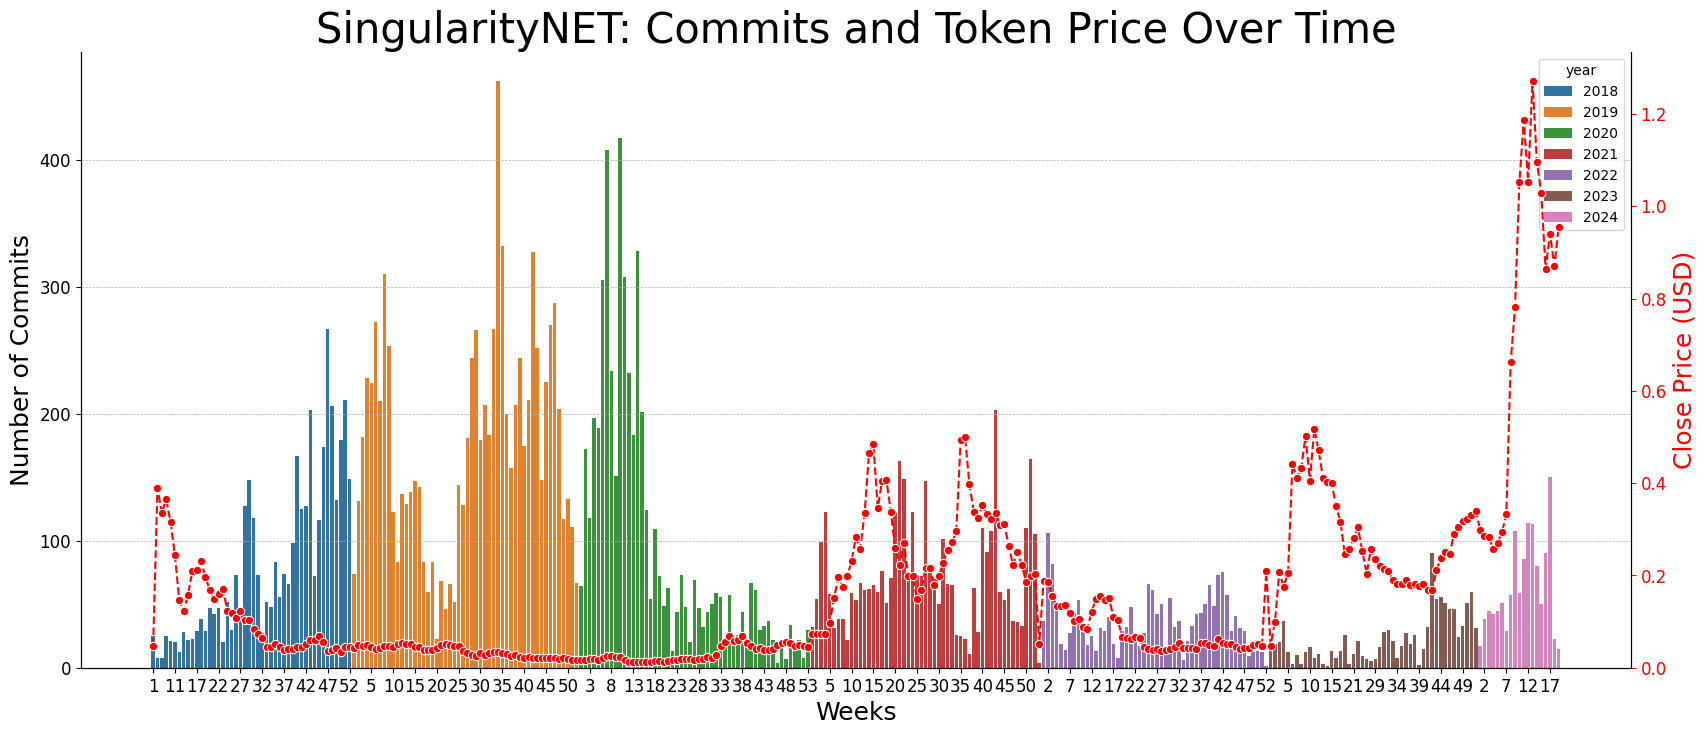

In [35]:
gen_correlations_over_time(df_singular_weekYear, 'SingularityNET', 5)